#  Demo for self-written data cleaning functions

* This notebook includes the step 1 & 2 in a ML data pipeline mainly using Pandas & self-written functions `data_cleaner.py`

* Step 1: brief overview of the data
    * find the data dense 
    * check missingness
* Step 2: data preprocessing
    * feature extraction
    * dtype transformation
    * standardization
    * label encoding

In [345]:
import pandas as pd
import numpy as np
import missingno as mn  # missing data visualization
import seaborn as sns
# self-written functions:
import sys
sys.path.append("funcs/")
import data_cleaner as dc
from importlib import reload
reload(dc)

<module 'data_cleaner' from 'funcs/data_cleaner.py'>

## Step 1. Brief overview of the data
### Set display:
`pd.set_option(pat, value)`
* use `display.max_columns` & `display.max_rows` to set max no. of col/row display
* set larger `display.max_colwidth` to check more unique value using dc.overview()
* `value=None` means unlimited

### TODO:
* See if dtypes are reasonable
* check some basic info; eg. missingness, size

### Functions applied
* pd.set_option()
* dc.overview(df)

In [346]:
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_colwidth', 100)  # max len of chr in 1 unit

In [347]:
raw = pd.read_csv("raw_data/ahp.csv")
display(raw.head())

,dt_sold,yr_sold,mo_sold,yr_built,yr_remodel,bldg_class,bldg_type,house_style,zoning,neighborhd,oa_cond,oa_qual,func,liv_area,1fl_area,2fl_area,tot_rms,bedroom,bathroom,kit,kit_qual,central_air,elect,bsmt_area,bsmt_cond,bsmt_exp,bsmt_fin_qual,bsmt_ht,ext_cond,ext_cover,ext_qual,fdn,fence,fp,fp_qual,gar_area,gar_car,gar_cond,gar_fin,gar_qual,gar_type,gar_yr,heat_qual,land_contour,land_slope,lot_area,lot_config,lot_frontage,lot_shape,pave_dr,roof_matl,roof_style,op_area,ep_area,wd_area,sale_price
0,2010-03-25,2010,3,1976.0,2005,60,1Fam,2Story,RL,Sawyer,8.0,6.0,Typ,1479,725,754,6,3,2.5,1,Good,Y,SBrkr,725.0,Average,No,GLQ,Average,Average,HdBoard,Good,CBlock,NaN,0,NaN,475.0,2.0,Average,RFn,Average,Attchd,1976.0,Excellent,Lvl,Gtl,13517,CulDSac,NaN,IR1,Y,CompShg,Gable,44,0,0,130.5
1,2009-04-10,2009,4,1996.0,1997,60,1Fam,2Story,RL,SawyerW,5.0,7.0,Typ,2122,913,1209,8,4,3.5,1,Good,Y,SBrkr,913.0,Average,No,GLQ,Good,Average,VinylSd,Good,PConc,NaN,1,Average,559.0,2.0,Average,RFn,Average,Attchd,1997.0,Excellent,Lvl,Gtl,11492,CulDSac,43.0,IR1,Y,CompShg,Gable,74,0,0,NaN
2,2010-01-15,2010,1,1953.0,2007,20,1Fam,1Story,RL,NAmes,7.0,5.0,Typ,1057,1057,0,5,3,2.0,1,Good,Y,SBrkr,1057.0,Average,No,GLQ,Average,Good,VinylSd,Average,CBlock,NaN,0,NaN,246.0,1.0,Average,Unf,Average,Detchd,1953.0,Average,Lvl,Gtl,7922,Inside,68.0,Reg,Y,CompShg,Gable,52,0,0,109.0
3,2010-04-19,2010,4,2006.0,2007,60,1Fam,2Story,RL,Timber,5.0,5.0,Typ,1444,744,700,7,3,2.5,1,Average,Y,SBrkr,384.0,Average,No,Unf,Good,Average,VinylSd,Average,PConc,NaN,0,NaN,400.0,2.0,Average,Fin,Average,BuiltIn,2007.0,Good,Lvl,Gtl,9802,Inside,73.0,Reg,Y,CompShg,Gable,0,0,100,174.0
4,2010-03-22,2010,3,1900.0,1993,50,1Fam,1.5Fin,RL,SawyerW,8.0,6.0,Typ,1445,831,614,6,3,2.0,1,Average,Y,SBrkr,676.0,Good,No,Unf,Fair,Average,Wd Sdng,Average,PConc,NaN,0,NaN,484.0,2.0,Average,Unf,Average,Detchd,1957.0,Average,Lvl,Gtl,14235,Inside,82.0,IR1,N,CompShg,Gable,59,0,0,138.5


In [348]:
ov = dc.overview(raw) 
display(ov.head())    # .sort_values('NaN_percentage', ascending=False)
display(ov.sort_values('unique_cnt', ascending=False).head())
# > no useless variables (eg. unique ID | only 1 group)
# > high missingness in 2 variables

size: (2048, 56)
Data types:
object     31
int64      15
float64    10
Name: dtype, dtype: int64


,dtype,NaN_percentage,unique_cnt,unique
fence,object,0.804688,5,"[nan, MnPrv, GdPrv, GdWo, MnWw]"
fp_qual,object,0.486816,6,"[nan, Average, Good, Poor, Excellent, Fair]"
lot_frontage,float64,0.161133,119,"[nan, 43.0, 68.0, 73.0, 82.0, 137.0, 35.0, 70.0, 21.0, 64.0, 120.0, 24.0, 74.0, 93.0, 34.0, 80.0..."
gar_yr,float64,0.055664,101,"[1976.0, 1997.0, 1953.0, 2007.0, 1957.0, 1966.0, 2005.0, 1959.0, 1952.0, 1969.0, 1971.0, 1900.0,..."
gar_cond,object,0.055664,6,"[Average, Fair, nan, Good, Excellent, Poor]"


,dtype,NaN_percentage,unique_cnt,unique
lot_area,int64,0.0,1475,"[13517, 11492, 7922, 9802, 14235, 16492, 3675, 12160, 15783, 11606, 1680, 7488, 26400, 2645, 962..."
dt_sold,object,0.0,1051,"[2010-03-25, 2009-04-10, 2010-01-15, 2010-04-19, 2010-03-22, 2010-06-06, 2006-06-14, 2010-05-08,..."
liv_area,int64,0.0,1051,"[1479, 2122, 1057, 1444, 1445, 1888, 1072, 1188, 924, 2080, 987, 1208, 2016, 1607, 1361, 1430, 1..."
1fl_area,int64,0.0,912,"[725, 913, 1057, 744, 831, 1888, 1072, 1188, 924, 1040, 483, 1208, 1288, 962, 1361, 1430, 624, 1..."
bsmt_area,float64,0.000488,892,"[725.0, 913.0, 1057.0, 384.0, 676.0, 1517.0, 547.0, 1188.0, 924.0, 1040.0, 483.0, 1208.0, 0.0, 9..."


In [349]:
# check object dtypes because they usually need dtype transformation:
pd.set_option('display.max_colwidth', 300)
display(ov[ov.dtype=='object'])
# > dt_sold should be date
# > others can applied label encoding (turn to int)


,dtype,NaN_percentage,unique_cnt,unique
fence,object,0.804688,5,"[nan, MnPrv, GdPrv, GdWo, MnWw]"
fp_qual,object,0.486816,6,"[nan, Average, Good, Poor, Excellent, Fair]"
gar_cond,object,0.055664,6,"[Average, Fair, nan, Good, Excellent, Poor]"
gar_qual,object,0.055664,6,"[Average, Fair, nan, Good, Excellent, Poor]"
gar_fin,object,0.055664,4,"[RFn, Unf, Fin, nan]"
gar_type,object,0.055176,7,"[Attchd, Detchd, BuiltIn, Basment, nan, 2Types, CarPort]"
bsmt_exp,object,0.027832,5,"[No, Gd, Av, nan, Mn]"
bsmt_fin_qual,object,0.026367,7,"[GLQ, Unf, ALQ, Rec, nan, BLQ, LwQ]"
bsmt_cond,object,0.026367,6,"[Average, Good, nan, Fair, Poor, Excellent]"
bsmt_ht,object,0.026367,6,"[Average, Good, Fair, nan, Excellent, Poor]"


In [350]:
# check the rest
ov[ov["dtype"]!='object'].sort_values(['dtype', 'unique_cnt'], ascending=False)
# > features start with yr_, mo_, dt_ are date related
# > there are some count data, but still normalize them since it generally don't hurt the data

,dtype,NaN_percentage,unique_cnt,unique
bsmt_area,float64,0.000488,892,"[725.0, 913.0, 1057.0, 384.0, 676.0, 1517.0, 547.0, 1188.0, 924.0, 1040.0, 483.0, 1208.0, 0.0, 960.0, 1351.0, 1430.0, 624.0, 1121.0, 660.0, 756.0, 894.0, 1501.0, 1209.0, 1168.0, 1056.0, 1453.0, 942.0, 957.0, 672.0, 2524.0, 792.0, 1494.0, 948.0, 1705.0, 160.0, 757.0, 1844.0, 1242.0, 990.0, 1256.0..."
sale_price,float64,0.001953,828,"[130.5, nan, 109.0, 174.0, 138.5, 190.0, 140.0, 142.0, 112.5, 135.0, 85.4, 183.6, 131.0, 200.0, 193.0, 173.5, 98.0, 139.0, 143.5, 215.2, 129.0, 278.0, 344.133, 185.0, 145.0, 187.5, 198.0, 119.6, 122.9, 230.0, 270.0, 125.0, 297.0, 113.5, 127.0, 175.5, 146.0, 147.5, 465.0, 165.5, 131.5, 129.5, 257..."
gar_area,float64,0.000488,515,"[475.0, 559.0, 246.0, 400.0, 484.0, 578.0, 525.0, 531.0, 420.0, 504.0, 264.0, 632.0, 576.0, 480.0, 610.0, 624.0, 513.0, 528.0, 614.0, 450.0, 499.0, 575.0, 572.0, 530.0, 336.0, 240.0, 0.0, 542.0, 481.0, 410.0, 826.0, 384.0, 546.0, 276.0, 850.0, 602.0, 352.0, 786.0, 660.0, 270.0, 280.0, 474.0, 440..."
lot_frontage,float64,0.161133,119,"[nan, 43.0, 68.0, 73.0, 82.0, 137.0, 35.0, 70.0, 21.0, 64.0, 120.0, 24.0, 74.0, 93.0, 34.0, 80.0, 71.0, 72.0, 109.0, 40.0, 103.0, 100.0, 92.0, 65.0, 75.0, 60.0, 30.0, 79.0, 41.0, 105.0, 107.0, 81.0, 36.0, 63.0, 32.0, 94.0, 44.0, 50.0, 48.0, 67.0, 88.0, 83.0, 53.0, 58.0, 57.0, 52.0, 87.0, 134.0, ..."
yr_built,float64,0.000488,114,"[1976.0, 1996.0, 1953.0, 2006.0, 1900.0, 1966.0, 2005.0, 1959.0, 1952.0, 1969.0, 1971.0, 1880.0, 1999.0, 2007.0, 2004.0, 1916.0, 1963.0, 1977.0, 2009.0, 1968.0, 2000.0, 1992.0, 1955.0, 1961.0, 1965.0, 1937.0, 1895.0, 1949.0, 1981.0, 1929.0, 1995.0, 1958.0, 1973.0, 1994.0, 1978.0, 1954.0, 1935.0,..."
gar_yr,float64,0.055664,101,"[1976.0, 1997.0, 1953.0, 2007.0, 1957.0, 1966.0, 2005.0, 1959.0, 1952.0, 1969.0, 1971.0, 1900.0, 2000.0, 2004.0, 1916.0, 1963.0, 1977.0, 2009.0, 1968.0, 1992.0, 1955.0, 1961.0, 1973.0, 1937.0, nan, 2003.0, 1981.0, 1931.0, 1995.0, 1958.0, 1965.0, 2006.0, 1978.0, 1954.0, 1935.0, 1951.0, 1996.0, 19..."
bathroom,float64,0.000977,12,"[2.5, 3.5, 2.0, 3.0, 1.0, 1.5, 4.5, 4.0, nan, 6.0, 5.0, 7.0]"
oa_qual,float64,0.000488,11,"[6.0, 7.0, 5.0, 8.0, nan, 10.0, 4.0, 9.0, 3.0, 2.0, 1.0]"
oa_cond,float64,0.000488,10,"[8.0, 5.0, 7.0, 6.0, nan, 3.0, 9.0, 2.0, 4.0, 1.0]"
gar_car,float64,0.000488,7,"[2.0, 1.0, 3.0, 0.0, 4.0, 5.0, nan]"


## Step 2. Data transformation & preprocessing
### TODO:
* data normalization: 
    * normalize numeric & ordered data
    * Normalization of count data typically does not harm ML performance)
    * recommend to do normalization before imputation (https://rdcu.be/detxN)
* transform data types
    * turn category features to integer labels (use Int64 to handle NA)
        * do this step after normalization to avoid normalization of categorical data
    * turn dates from object to date
* Feature extraction:
    * extract features from dates
    
### Functions applied:
* dc.match_cols(df.columns, pattern): 
    * find features that match regex
* dc.extract_date_features(df, col, date_format, label):
    * extract features from date
* dc.standardization(df, cols)
* dc.label_encoding(df, max_categories=30)

In [351]:
## Date transformation
df = raw.copy()
date_cols = dc.match_cols(df.columns, r"^(dt_|yr_|mo_|day)")
df[date_cols].head()  # only dt_sold should be date format
dc.extract_date_features(df, 'dt_sold', date_format='%Y-%m-%d', label='sold')

In [352]:
# view extracted features:
extracted_cols = df.loc[:,df.columns.str.endswith("sold")]
dc.overview(extracted_cols)

size: (2048, 5)
Data types:
int64             4
datetime64[ns]    1
Name: dtype, dtype: int64


,dtype,NaN_percentage,unique_cnt,unique
dt_sold,datetime64[ns],0.0,1051,"[2010-03-25T00:00:00.000000000, 2009-04-10T00:00:00.000000000, 2010-01-15T00:00:00.000000000, 2010-04-19T00:00:00.000000000, 2010-03-22T00:00:00.000000000, 2010-06-06T00:00:00.000000000, 2006-06-14T00:00:00.000000000, 2010-05-08T00:00:00.000000000, 2007-06-14T00:00:00.000000000, 2007-09-01T00:00..."
day_sold,int64,0.0,28,"[25, 10, 15, 19, 22, 6, 14, 8, 1, 5, 16, 3, 4, 9, 28, 11, 7, 17, 20, 2, 24, 23, 13, 26, 27, 18, 21, 12]"
mo_sold,int64,0.0,12,"[3, 4, 1, 6, 5, 9, 7, 2, 12, 10, 11, 8]"
wday_sold,int64,0.0,7,"[3, 4, 0, 6, 2, 5, 1]"
yr_sold,int64,0.0,5,"[2010, 2009, 2006, 2007, 2008]"


In [353]:
## Standardization:
dc.standardization(df)  # default: normalization for all numeric features

In [354]:
# view normalized features:
numeric_cols = df.select_dtypes(include=np.number).columns
df.describe().round(4)

,yr_sold,mo_sold,yr_built,yr_remodel,bldg_class,oa_cond,oa_qual,liv_area,1fl_area,2fl_area,tot_rms,bedroom,bathroom,kit,bsmt_area,fp,gar_area,gar_car,gar_yr,lot_area,lot_frontage,op_area,ep_area,wd_area,sale_price,day_sold,wday_sold
count,2048.0000,2048.0000,2047.0000,2048.0000,2048.0000,2047.0000,2047.0000,2048.0000,2048.0000,2048.0000,2048.0000,2048.0000,2046.0000,2048.0000,2047.0000,2048.0000,2047.0000,2047.0000,1934.0000,2048.0000,1718.0000,2048.0000,2048.0000,2048.0000,2044.0000,2048.0000,2048.0000
mean,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.3540,-1.9035,-3.3061,-1.6295,-0.8644,-4.1280,-3.5983,-2.3308,-2.0961,-0.7739,-2.8444,-3.4401,-1.5164,-4.9680,-2.3586,-0.9267,-2.1927,-2.3218,-3.2969,-1.2994,-2.0652,-0.7133,-0.3767,-0.7300,-2.1309,-1.6680,-1.5521
25%,-0.5920,-0.8090,-0.5880,-0.9156,-0.8644,-0.5091,-0.7854,-0.7382,-0.7189,-0.7739,-0.9214,-1.0211,-0.2764,-0.2047,-0.5911,-0.9267,-0.7163,-1.0147,-0.6993,-0.3803,-0.4754,-0.7133,-0.3767,-0.7300,-0.6531,-0.9173,-1.0420
50%,0.1700,-0.0793,0.0749,0.4169,-0.1642,-0.5091,-0.0821,-0.1091,-0.1817,-0.7739,-0.2804,0.1884,-0.2764,-0.2047,-0.1401,0.6392,0.0288,0.2925,0.0484,-0.0960,-0.0458,-0.3089,-0.3767,-0.7300,-0.2392,-0.0415,-0.0219
75%,0.9321,0.6504,0.9699,0.9404,0.3026,0.3956,0.6211,0.4581,0.6052,0.8565,0.3606,0.1884,0.9637,-0.2047,0.5794,0.6392,0.4731,0.2925,0.9143,0.2146,0.4698,0.3351,-0.3767,0.5766,0.4082,0.8343,0.9982
max,1.6941,2.1098,1.2682,1.2260,3.1032,3.1097,2.7309,8.2791,9.9123,3.5989,5.4886,6.2358,5.9239,9.3220,11.2509,5.3371,4.3701,4.2138,8.9824,22.0783,10.4810,7.4789,6.8613,10.3447,5.4263,1.7102,1.5083


In [355]:
dc.overview(df)

size: (2048, 58)
Data types:
object            30
float64           27
datetime64[ns]     1
Name: dtype, dtype: int64


,dtype,NaN_percentage,unique_cnt,unique
fence,object,0.804688,5,"[nan, MnPrv, GdPrv, GdWo, MnWw]"
fp_qual,object,0.486816,6,"[nan, Average, Good, Poor, Excellent, Fair]"
lot_frontage,float64,0.161133,119,"[nan, -1.1199324584898889, -0.04576767304681749, 0.16906528404179677, 0.5557646068013025, 2.9189271347760593, -1.4636651898316715, 0.04016550978862822, -2.0651974696797915, -0.2176340387177089, 2.188495080674771, -1.936297695426623, 0.21203187545951963, 1.0283971123962539, -1.5066317812493943, 0..."
gar_yr,float64,0.055664,101,"[-0.10899418322299566, 0.7174975563996068, -1.0141994218572745, 1.111065051457989, -0.8567724238339216, -0.5025616782813778, 1.0323515524463125, -0.7780589248222453, -1.0535561713631127, -0.38449142976386314, -0.30577793075218673, -3.1001071456666995, 0.8355678049171215, 0.9929948029404743, -2.4..."
gar_cond,object,0.055664,6,"[Average, Fair, nan, Good, Excellent, Poor]"
gar_qual,object,0.055664,6,"[Average, Fair, nan, Good, Excellent, Poor]"
gar_fin,object,0.055664,4,"[RFn, Unf, Fin, nan]"
gar_type,object,0.055176,7,"[Attchd, Detchd, BuiltIn, Basment, nan, 2Types, CarPort]"
bsmt_exp,object,0.027832,5,"[No, Gd, Av, nan, Mn]"
bsmt_fin_qual,object,0.026367,7,"[GLQ, Unf, ALQ, Rec, nan, BLQ, LwQ]"


In [356]:
## Label encoding:
lbls = dc.label_encoding(df)
display(lbls)   # original & new label matching table

,bldg_type,house_style,zoning,neighborhd,func,kit_qual,central_air,elect,bsmt_cond,bsmt_exp,bsmt_fin_qual,bsmt_ht,ext_cond,ext_cover,ext_qual,fdn,fence,fp_qual,gar_cond,gar_fin,gar_qual,gar_type,heat_qual,land_contour,land_slope,lot_config,lot_shape,pave_dr,roof_matl,roof_style
0,1Fam,1.5Fin,A (agr),Blmngtn,Maj1,Average,N,FuseA,Average,Av,ALQ,Average,Average,AsbShng,Average,BrkTil,GdPrv,Average,Average,Fin,Average,2Types,Average,Bnk,Gtl,Corner,IR1,N,ClyTile,Flat
1,2fmCon,1.5Unf,C (all),Blueste,Maj2,Excellent,Y,FuseF,Excellent,Gd,BLQ,Excellent,Excellent,AsphShn,Excellent,CBlock,GdWo,Excellent,Excellent,RFn,Excellent,Attchd,Excellent,HLS,Mod,CulDSac,IR2,P,CompShg,Gable
2,Duplex,1Story,FV,BrDale,Min1,Fair,NaN,FuseP,Fair,Mn,GLQ,Fair,Fair,BrkComm,Fair,PConc,MnPrv,Fair,Fair,Unf,Fair,Basment,Fair,Low,Sev,FR2,IR3,Y,Membran,Gambrel
3,Twnhs,2.5Fin,I (all),BrkSide,Min2,Good,NaN,Mix,Good,No,LwQ,Good,Good,BrkFace,Good,Slab,MnWw,Good,Good,NaN,Good,BuiltIn,Good,Lvl,NaN,FR3,Reg,NaN,Tar&Grv,Hip
4,TwnhsE,2.5Unf,RH,ClearCr,Mod,NaN,NaN,SBrkr,Poor,NaN,Rec,Poor,Poor,CBlock,NaN,Stone,NaN,Poor,Poor,NaN,Poor,CarPort,NaN,NaN,NaN,Inside,NaN,NaN,WdShake,Mansard
5,NaN,2Story,RL,CollgCr,Sal,NaN,NaN,NaN,NaN,NaN,Unf,NaN,NaN,CemntBd,NaN,Wood,NaN,NaN,NaN,NaN,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,WdShngl,Shed
6,NaN,SFoyer,RM,Crawfor,Sev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HdBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,SLvl,NaN,Edwards,Typ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ImStucc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,Gilbert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MetalSd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,Greens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Plywood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [370]:
# cleaned data:
pd.set_option('display.max_colwidth', 100) 
dc.overview(df)

size: (2048, 58)
Data types:
Int64             30
float64           27
datetime64[ns]     1
Name: dtype, dtype: int64


,dtype,NaN_percentage,unique_cnt,unique
fence,Int64,0.804688,5,"[<NA>, 2, 0, 1, 3]"
fp_qual,Int64,0.486816,6,"[<NA>, 0, 3, 4, 1, 2]"
lot_frontage,float64,0.161133,119,"[nan, -1.1199324584898889, -0.04576767304681749, 0.16906528404179677, 0.5557646068013025, 2.9189..."
gar_yr,float64,0.055664,101,"[-0.10899418322299566, 0.7174975563996068, -1.0141994218572745, 1.111065051457989, -0.8567724238..."
gar_cond,Int64,0.055664,6,"[0, 2, <NA>, 3, 1, 4]"
gar_qual,Int64,0.055664,6,"[0, 2, <NA>, 3, 1, 4]"
gar_fin,Int64,0.055664,4,"[1, 2, 0, <NA>]"
gar_type,Int64,0.055176,7,"[1, 5, 3, 2, <NA>, 0, 4]"
bsmt_exp,Int64,0.027832,5,"[3, 1, 0, <NA>, 2]"
bsmt_fin_qual,Int64,0.026367,7,"[2, 5, 0, 4, <NA>, 1, 3]"


In [368]:
# Save cleaned data
df.to_parquet('clean_data/ahp.parquet.gzip',compression='gzip') 
# df.to_pickle('clean_data/ahp.pkl')   # convinient but large size, keep dtype info
# df.to_csv('clean_data/ahp.csv')      # not recommend, large size & can't keep dtype info

In [369]:
# dc.overview(pd.read_pickle('clean_data/ahp.pkl'))
# dc.overview(pd.read_csv('clean_data/ahp.csv'))
df = pd.read_parquet('clean_data/ahp.parquet.gzip')
df.head()

,dt_sold,yr_sold,mo_sold,yr_built,yr_remodel,bldg_class,bldg_type,house_style,zoning,neighborhd,oa_cond,oa_qual,func,liv_area,1fl_area,2fl_area,tot_rms,bedroom,bathroom,kit,kit_qual,central_air,elect,bsmt_area,bsmt_cond,bsmt_exp,bsmt_fin_qual,bsmt_ht,ext_cond,ext_cover,ext_qual,fdn,fence,fp,fp_qual,gar_area,gar_car,gar_cond,gar_fin,gar_qual,gar_type,gar_yr,heat_qual,land_contour,land_slope,lot_area,lot_config,lot_frontage,lot_shape,pave_dr,roof_matl,roof_style,op_area,ep_area,wd_area,sale_price,day_sold,wday_sold
0,2010-03-25,1.694126,-1.173800,0.141222,0.988023,0.069174,0,5,5,22,2.204987,-0.082108,7,-0.042132,-1.109874,0.996858,-0.280437,0.188392,0.343653,-0.204674,3,1,4,-0.743722,0,3,2,0,0,6,3,1,<NA>,-0.926735,<NA>,0.005686,0.292454,0,1,0,1,-0.108994,1,3,0,0.511677,1,NaN,0,2,1,1,-0.054312,-0.376746,-0.730006,-0.645503,1.334822,-0.021917
1,2009-04-10,0.932085,-0.808958,0.804174,0.607295,0.069174,0,5,5,23,-0.509149,0.621134,7,1.243127,-0.635694,2.065390,1.001560,1.397880,1.583711,-0.204674,3,1,4,-0.324969,0,3,2,3,0,12,3,2,<NA>,0.639233,0,0.394457,0.292454,0,1,0,1,0.717498,1,3,0,0.211488,1,-1.119932,0,2,1,1,0.394983,-0.376746,-0.730006,NaN,-0.541956,0.488143
2,2010-01-15,1.694126,-1.903484,-0.621174,1.083204,-0.864388,0,2,5,15,1.300275,-0.785350,7,-0.885646,-0.272493,-0.773854,-0.921435,0.188392,-0.276377,-0.204674,3,1,4,-0.004222,0,3,2,0,3,12,0,1,<NA>,-0.926735,<NA>,-1.054176,-1.014650,0,2,0,5,-1.014199,0,3,0,-0.317733,4,-0.045768,3,2,1,1,0.065500,-0.376746,-0.730006,-0.916814,0.083636,0.488143
3,2010-04-19,1.694126,-0.808958,1.135650,1.083204,0.069174,0,5,5,26,-0.509149,-0.785350,7,-0.112092,-1.061951,0.870043,0.360562,0.188392,0.343653,-0.204674,0,1,4,-1.503268,0,3,5,3,0,12,0,2,<NA>,-0.926735,<NA>,-0.341430,0.292454,0,0,0,3,1.111065,3,3,0,-0.039039,4,0.169065,3,2,1,1,-0.713278,-0.376746,0.047715,-0.096571,0.584111,-1.552095
4,2010-03-22,1.694126,-1.173800,-2.377998,0.416932,-0.164217,0,0,5,23,2.204987,-0.082108,7,-0.110093,-0.842517,0.668078,-0.280437,0.188392,-0.276377,-0.204674,0,1,4,-0.852865,3,3,5,2,0,13,0,2,<NA>,-0.926735,<NA>,0.047340,0.292454,0,2,0,5,-0.856772,0,3,0,0.618114,4,0.555765,0,0,1,1,0.170336,-0.376746,-0.730006,-0.544550,0.959466,-1.552095


## Step 3. Exploratory analysis:
* univariate, paired distribution
* feature correlations
* missing data visualization

<AxesSubplot: >

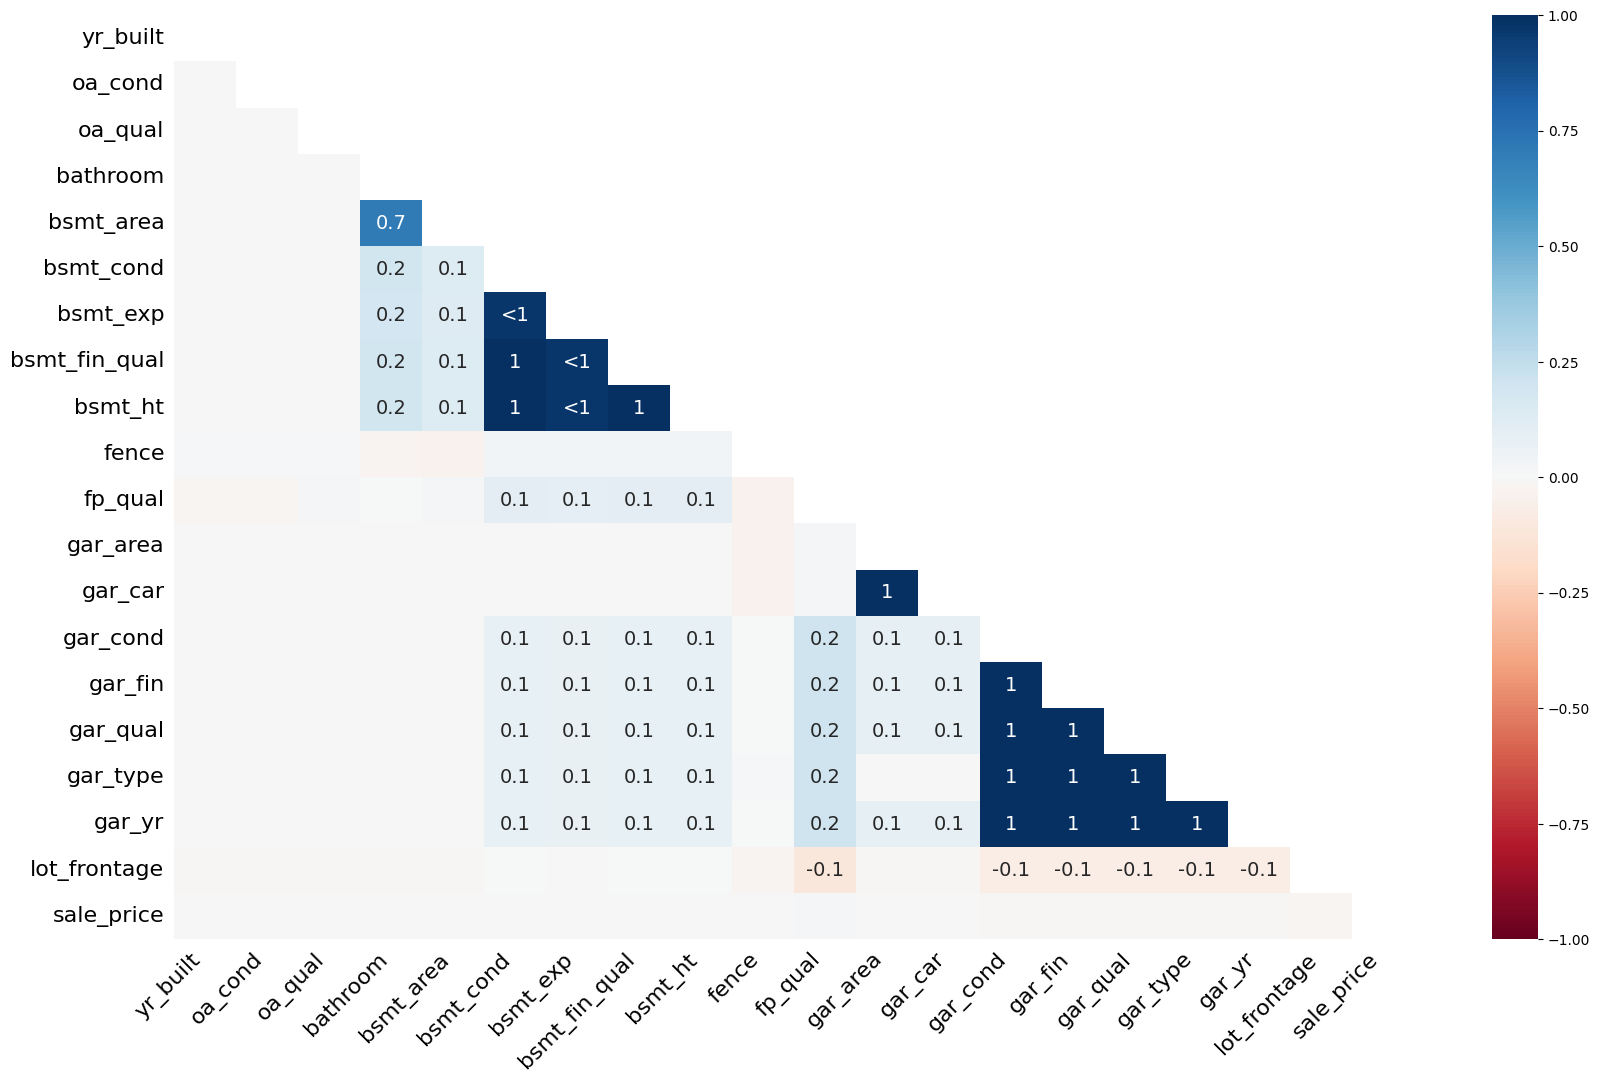

In [344]:
# Missingness visualization:
yes_na = raw.loc[:,raw.isna().mean()!=0]
# mn.matrix(yes_na)
mn.heatmap(yes_na)